# Aspectos preliminares

In [14]:
#Importar lo necesario

import seaborn as sns
import music21
import sys
import os
import numpy as np
from IPython.display import Image, Audio
import pandas as pd
# import path # to change the jupyter notebook working directory
import sys
import os
import more_itertools
import yaml
sys.path.insert(0, 'C:\\Users\\ferna\\Documents\\Desarrollo\\Python\\patternfinder')
# Desactiva logging de finder.py (líneas 90-92) y de algorithms.py (líneas98-100)
os.path.supports_unicode_filenames
# Configurar variables
# import path # to change the jupyter notebook working directory
sys.path.insert(
    0, 'C:\\Users\\ferna\\Documents\\Desarrollo\\Python\\melodic-similarity\\src')
# from mtc_to_seqs import *
# Configurar rutas de music21
us = music21.environment.UserSettings()
# get environment
env = music21.environment.Environment()

# check the path
# print('Environment settings:')
# print('musicXML:  ', env['musicxmlPath'])
# print('musescore: ', env['musescoreDirectPNGPath'])
os.path.exists(env['musescoreDirectPNGPath'])

# set path if necessary
env['directoryScratch'] = r'C:\tmp'
# env['musicxmlPath'] = 'path/to/your/musicXmlApplication'
# env['musescoreDirectPNGPath'] = 'path/to/your/museScore'
us['musescoreDirectPNGPath'] = r'C:\Program Files\MuseScore 3\bin\MuseScore3.exe'
# us['musicxmlPath'] = r'C:\Program Files\MuseScore 3\bin\MuseScore3.exe'
us['localCorpusPath'] = r'G:\Unidades compartidas\MUCOSIMBANDES\Corpus\Archivos MusicXML'

# Configurar directorio de trabajo
dataDirectory = 'G:/Unidades compartidas/MUCOSIMBANDES/Corpus/'
# Imprimir listado de archivos
dir = sorted(os.listdir(dataDirectory))
# print(len(dir), " archivos")
# print(dir)

In [15]:
from patternfinder.geometric_helsinki import Finder

In [16]:
#Crear dataframe de características generales
# Simply change de URL from Google Drive using uc?id=, and then pass it to the read_csv function. In this example:
sheet_url = 'https://docs.google.com/spreadsheets/d/1xBZdHDgRIFzIPSxU4yeLvYYvHZ75DxBg3sYRAks1y5g/edit#gid=0'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
dfCorpus = pd.read_csv(csv_export_url)
df_obj = dfCorpus.select_dtypes(['object'])
dfCorpus[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
dfCorpus = dfCorpus.drop(
    ['Patrones', 'Digitador', 'MODA', 'Observaciones', 'Fuente (APA)'], axis=1)
dfCorpus.sample(2)


,Título,SS,Género,Tonalidad,Compositor,Período,Fecha de composición
8,Colón,NaN,Pasillo,E,Carlos Escamilla,1,NaN
24,Preludio y Fuga,NaN,Pasillo,Dm,Héctor Fabio Torres,3,NaN


In [52]:
#Crear dataframe de características ampliadas
sheet_url = 'https://docs.google.com/spreadsheets/d/1xBZdHDgRIFzIPSxU4yeLvYYvHZ75DxBg3sYRAks1y5g/edit#gid=831749707'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
dfValoracion = pd.read_csv(csv_export_url)
df_obj = dfValoracion.select_dtypes(['object'])
dfValoracion[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
# dfCorpus=dfCorpus.drop(['SS', 'Patrones', 'Digitador','MODA', 'Observaciones','Fuente (APA)'], axis=1)
dfValoracion.sample(2)

,Título,ARMONÍA,FORMA,TEXTURA,FORMAS MELÓDICAS,CONSONANCIA Y DISONANCIA,ESTRUCTURA RÍTMICA,CRONOLOGÍA,CONTEXTO,SONORIDAD,MODA
8,Aroma de cielo,3.0,3.0,1.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0
28,Colón,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


In [18]:
#Combinar dataframes
# Restablecer los valores de índice a la segunda __DataFrame__ adjunta correctamente
dfCorpus = dfCorpus.reset_index(drop=True)
# Incluir los que no están en una de los dos datasets ,how = 'outer'
merged_inner = pd.merge(left=dfCorpus, right=dfValoracion,
                        left_on='Título', right_on='Título')

#Eliminar columnas
merged_inner=merged_inner.drop(['Fecha de composición'], axis=1)
#Filtrar columnas inncecesarias
merged_inner[(merged_inner['SS'] =='x')]
merged_inner = merged_inner.drop(['SS'], axis=1)
merged_inner.sample(2)


,Título,Género,Tonalidad,Compositor,Período,ARMONÍA,FORMA,TEXTURA,FORMAS MELÓDICAS,CONSONANCIA Y DISONANCIA,ESTRUCTURA RÍTMICA,CRONOLOGÍA,CONTEXTO,SONORIDAD,MODA
112,San Pedro en El Espinal,Bambuco,Gm,Milciades Garavito Wheeler,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0
44,El intensos,Pasillo,Dm,Javier Pérez Sandoval,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# Crear dataframe de patrones
# Simply change de URL from Google Drive using uc?id=, and then pass it to the read_csv function. In this example:
sheet_url = 'https://docs.google.com/spreadsheets/d/1xBZdHDgRIFzIPSxU4yeLvYYvHZ75DxBg3sYRAks1y5g/edit#gid=637689968'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
dfPatrones = pd.read_csv(csv_export_url)
df_obj = dfPatrones.select_dtypes(['object'])
dfPatrones[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
dfPatrones = dfPatrones.drop(
    ['Observaciones', 'VALOR RÍTMICO MÍNIMO', 'CANTIDAD DE COMPASES', 'INTERVALO MÍNIMO', 'INTERVALO MÁXIMO', 'PATRÓN', 'VALOR RÍTMICO MÁXIMO', 'TIEMPO DE INICIO (1-6, 6/8; 1-3 3/4)', 'TIEMPO FINAL (1-6, 6/8; 1-3 3/4)'], axis=1)
dfPatrones['ENLACE'] = dfPatrones['ENLACE'].replace({'.xml': ''}, regex=True)
dfPatrones['ENLACE'] = dfPatrones['ENLACE'].replace(
    {'.XML': ''}, regex=True)
dfPatrones = dfPatrones.rename(columns={'ENLACE': 'Patrón'})
dfPatrones.sample(5)

,Patrón,Obra,RITMO,Compás,Tiempo
23,00067,Gloria beatríz,Bambuco,1,3.0
303,00293,Tiempos,Pasillo,66,1.0
10,00045,A pesar de todo,Bambuco,24,1.0
182,00025,Estudio de Pasillo No. 3,Pasillo,1,1.0
326,00261,Pasillo No. 8,Pasillo,21,1.0


# Índices

00004


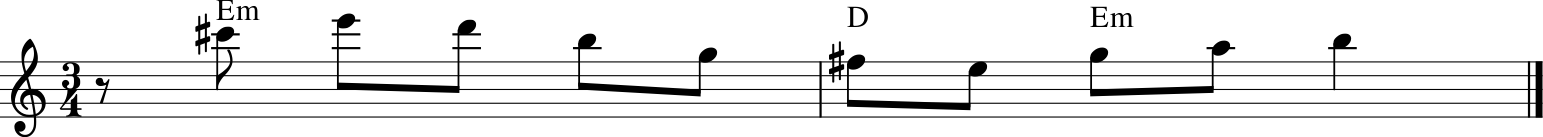

00005


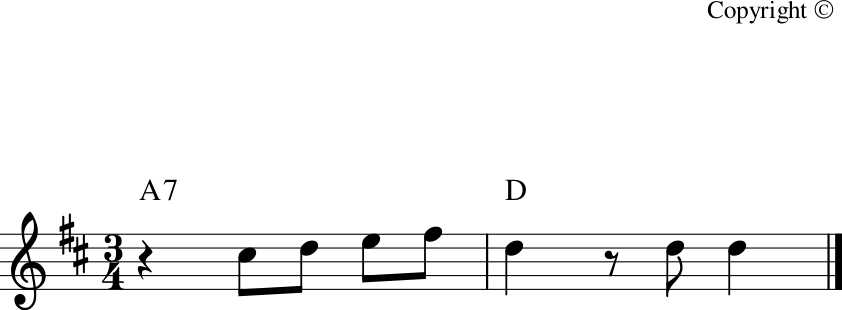

In [109]:
#Índice de patrones
filtred = dfPatrones[(
    dfPatrones['RITMO'].str.contains('Pasillo', case=False))]
listaPatrones = pd.unique(filtred['Patrón'])
listaPatrones = listaPatrones[1:3]
for i in listaPatrones:
    try:
        print(i)
        pattern = music21.corpus.getWork(i)
        pattern = music21.converter.parse(pattern)
        pattern.removeByClass(music21.metadata.Metadata)
        #pattern.removeByClass(music21.chord.ChordSymbol)
        #pattern = pattern.measures(1, 2)
        pattern.show()
    except:
        print('Error en ', i)


Pasillo D
Adolfo Mejía


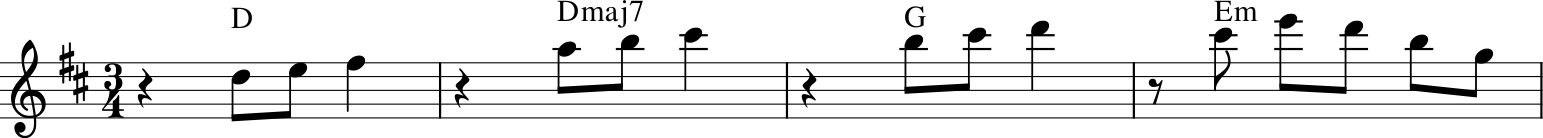

Pasillo in Moto Perpetuo
Alfonso Garavito Wheeler


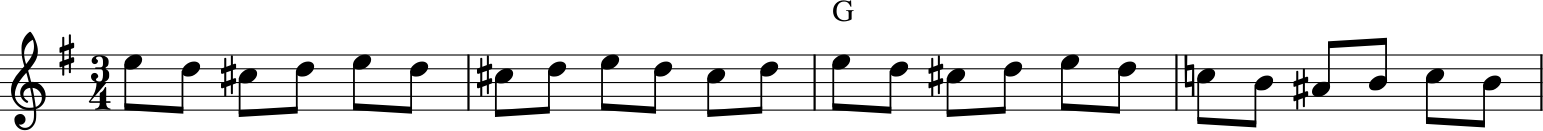

In [100]:
# Indice de obras
filtred = merged_inner[(
    merged_inner['Género'].str.contains('Pasillo', case=False))]
listaObras = pd.unique(filtred['Título'])
listaObras = listaObras[1:3]
for i in listaObras:
    try:
        s = music21.corpus.getWork(i)
        source = music21.converter.parse(s)
        source.removeByClass(music21.metadata.Metadata)
        print(i)
        Autor = merged_inner.loc[(merged_inner['Título'] == i) , 'Compositor'].values[0]
        print(Autor)
        source.measures(1, 4).show()
    except:
        print('Error en ', i)


# Búsqueda de patrones

In [212]:
def buscarPatronEnConjunto(p,sh=False):
    occurences = 0
    errores=0
    noProcesados=[]
    #Buscar patrón en conjunto de obras
    import traceback
    #Definir el subconjunto de obras de interés
    filtred=merged_inner[(merged_inner['Género'].str.contains('Pasillo', case=False))]
    filtred=merged_inner
    a=pd.unique(filtred['Título'])
    #a=a[60:80]
    try:
        pattern = music21.corpus.getWork(p)
        pattern=music21.converter.parse(pattern)
        #pattern = pattern.measures(2,2)
        if sh==True:
            pattern.removeByClass(music21.metadata.Metadata)
            print(p)
            pattern.show()

        for i in a:
            try:
                s = music21.corpus.getWork(i)
                source = music21.converter.parse(s)
                # source=source.measures(2,5)
                finder = Finder(pattern,
                                source,
                                algorithm='P1',
                                threshold=0.9,
                                # scale = 'warped',
                                # Only accepts occurrences of a particular
                                # interval_func='generic',
                                # 'semitones'
                                pattern_window=1,
                                # Similar to 'source_window' but applies to the number of missing notes between any two matched pattern notes.
                                source_window=1
                                # Limits the search space by limiting the number of intervening notes allowed between any two source notes within the occurrence
                                )
                for occ in finder:
                    occurences = occurences+1
                    ex = occ.get_excerpt(
                        left_padding=1, right_padding=1, color='red')
                    ex.metadata.title = str(i) + " "+ex.metadata.title
                    if sh == True:
                        print(ex.metadata.title)
                        ex.metadata.title=''
                        Autor = merged_inner.loc[(
                            merged_inner['Título'] == i), 'Compositor'].values[0]
                        print(Autor)
                        ex.show()
            except Exception as e:
                exc_type, exc_value, exc_traceback = sys.exc_info()
                # dfExc.loc[i]=[exc_value]
                # print('Error en ', i+ " ",exc_value)
                errores = errores+1
    except:
        #print("El patrón "+ p+ " no existe o no se pudo procesar")
        noProcesados.append(i)
    #print (occurences," Ocurrencias")
    #print (errores," Errores")
    if len(noProcesados)!=0:
        print("Los siguientes archivos no pudieron ser procesados: ")
        print(noProcesados)
    return occurences


In [213]:
# Buscar todos los patrones en conjunto
noProcesados = []
results = pd.DataFrame()
filtred = dfPatrones[(
    dfPatrones['RITMO'].str.contains('Pasillo', case=False))]
listaPatrones = pd.unique(filtred['Patrón'])
listaPatrones = listaPatrones[1:25]
results['Patrón'] = None
results['Ocurrencias'] = None
ocurrencias=0
for i in listaPatrones:
    try:
        oc=buscarPatronEnConjunto(i)   
        ocurrencias = ocurrencias+oc
        new_row = pd.DataFrame.from_records({'Patrón': [i], 'Ocurrencias': [oc]})
        results = pd.concat([results, new_row])
    except:
        #print('Error en ', i)
        pass
if len(noProcesados) != 0:
    print("Los siguientes patrones no pudieron ser procesados: ")
    print(noProcesados)
results


,Patrón,Ocurrencias
0,00004,1
0,00005,1
0,00006,1
0,00007,1
0,00008,1
0,00009,1
0,00010,1
0,00011,1
0,00014,1
0,00015,1


In [214]:
results_sorted = results.sort_values('Ocurrencias', ascending=False)
results_sorted.head(10)


,Patrón,Ocurrencias
0,00020,26
0,00004,1
0,00015,1
0,00028,1
0,00027,1
0,00026,1
0,00025,1
0,00005,1
0,00016,1
0,00029,1


00020


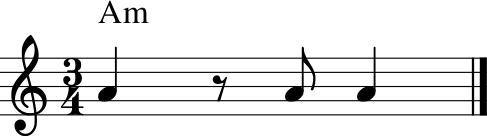

El Colombiano  mm. 67 - 67
Antonio Silva Gómez


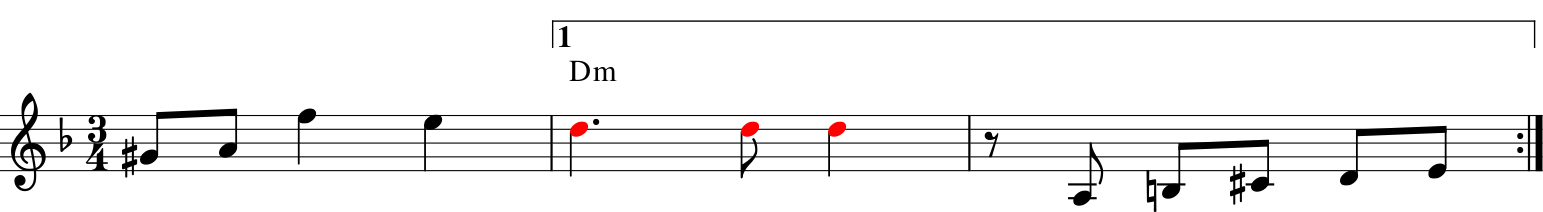

Desde Lejos  mm. 20 - 20
Bonifacio Bautista


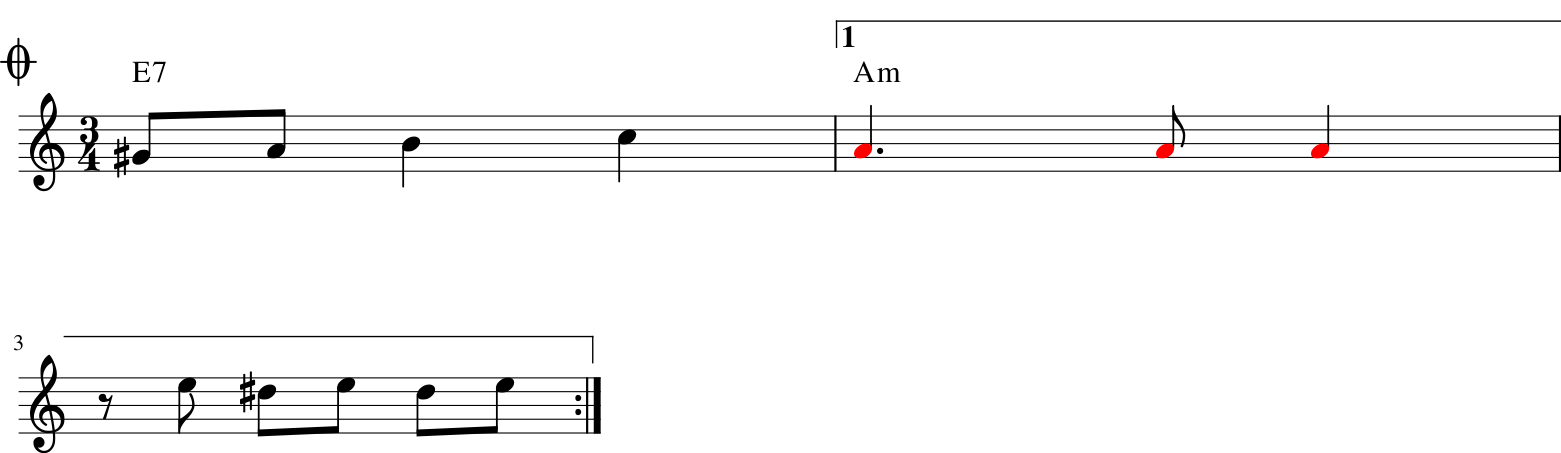

Desde Lejos  mm. 22 - 22
Bonifacio Bautista


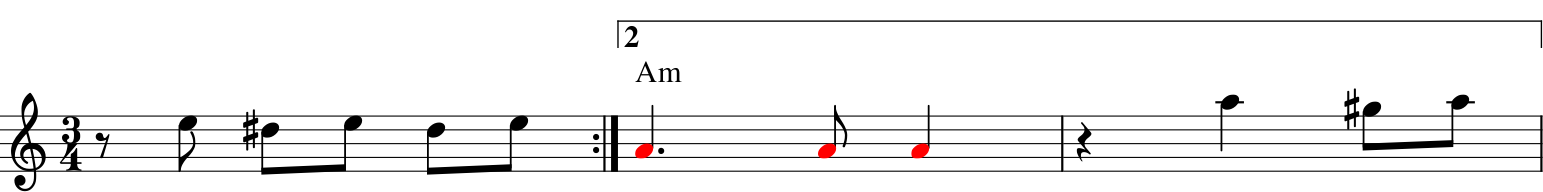

Desde Lejos  mm. 42 - 42
Bonifacio Bautista


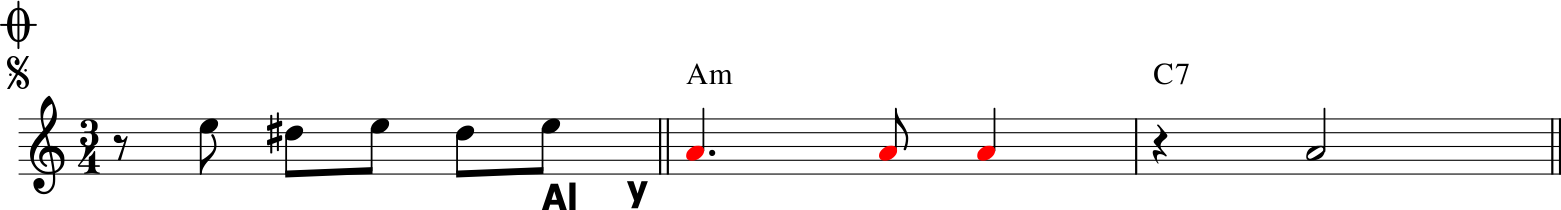

Ricitos de Oro  mm. 16 - 16
Emilio Sierra


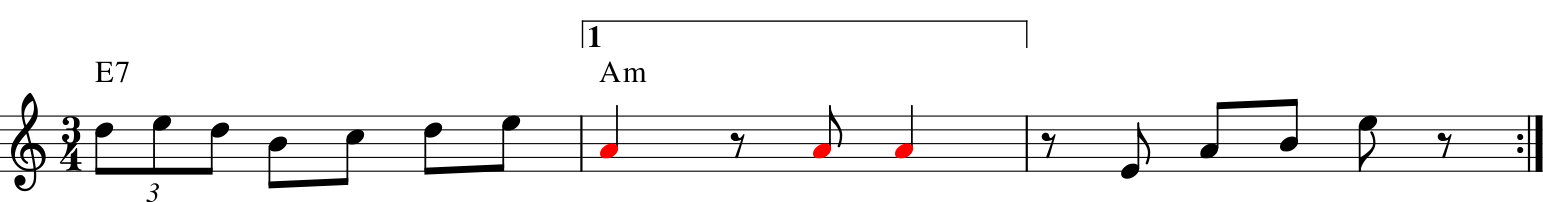

Ricitos de Oro  mm. 18 - 18
Emilio Sierra


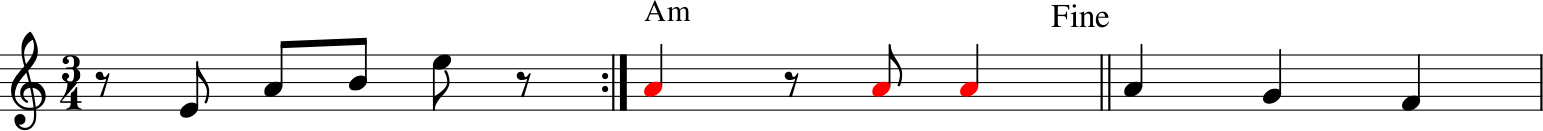

Ricitos de Oro  mm. 36 - 36
Emilio Sierra


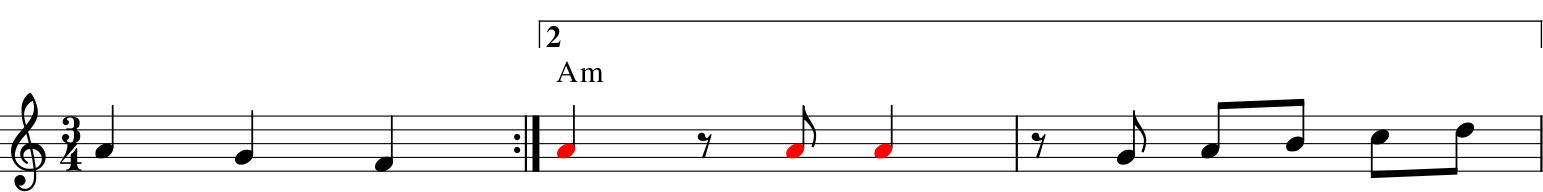

Diabólico  mm. 71 - 71
Hector Fabio Torres


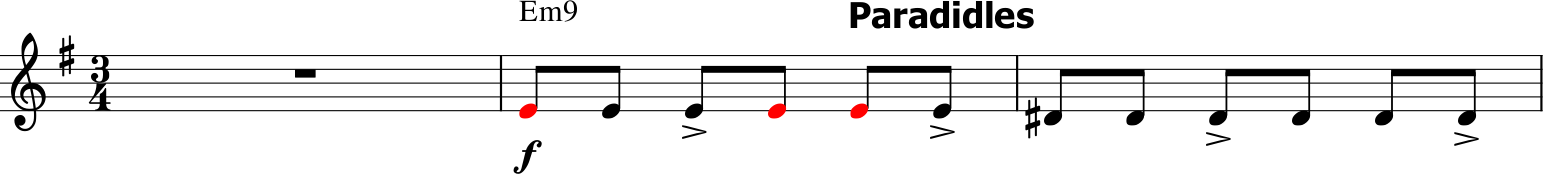

Diabólico  mm. 78 - 78
Hector Fabio Torres


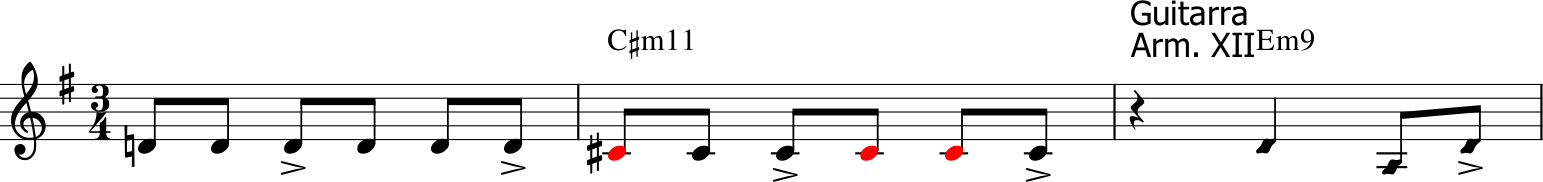

Preludio y Fuga  mm. 59 - 59
Héctor Fabio Torres


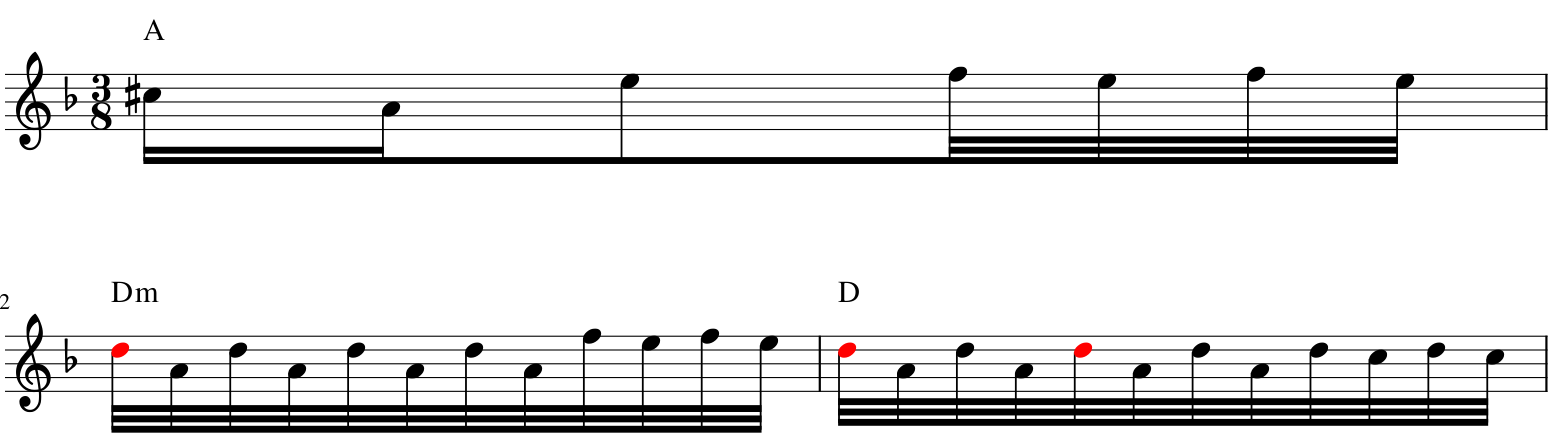

Preludio y Fuga  mm. 132 - 132
Héctor Fabio Torres


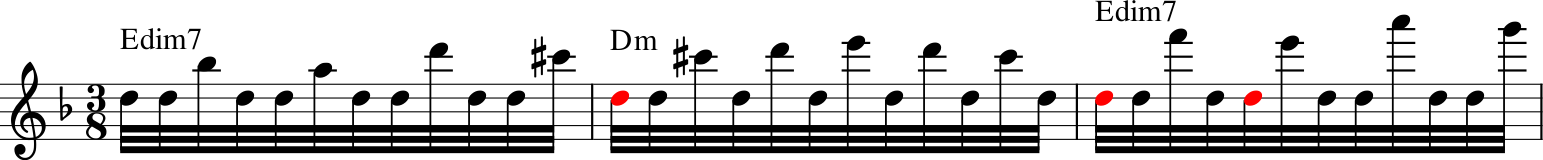

Por qué te fuiste  mm. 15 - 15
Rosita Rocha


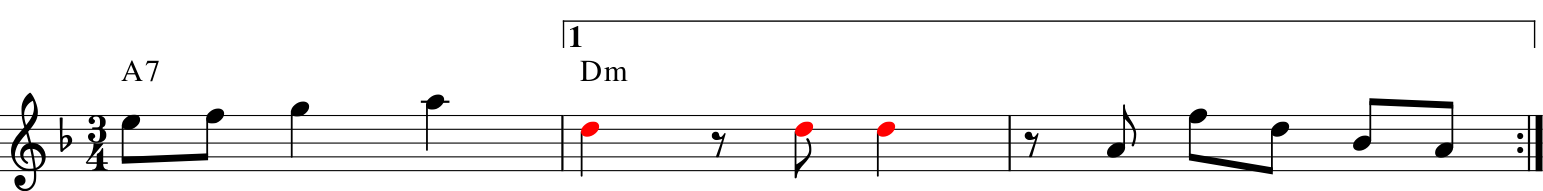

Por qué te fuiste  mm. 17 - 17
Rosita Rocha


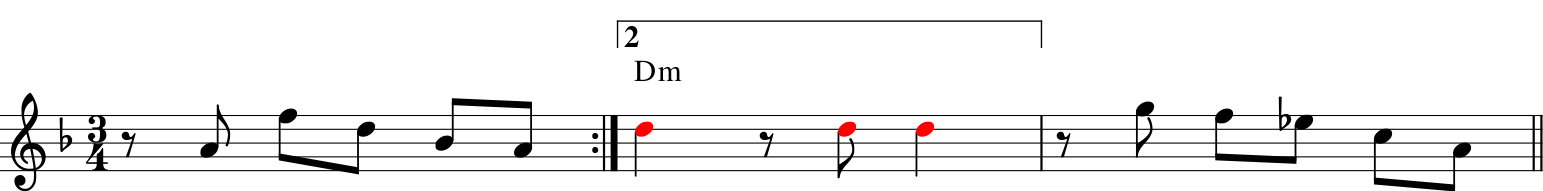

Por qué te fuiste  mm. 55 - 55
Rosita Rocha


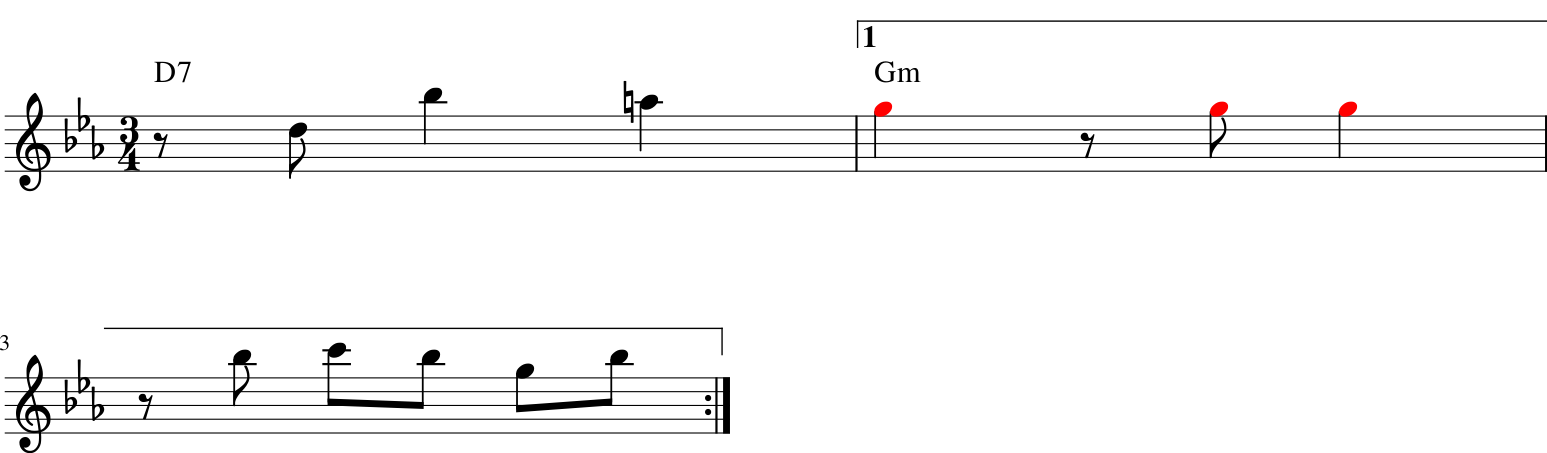

Por qué te fuiste  mm. 57 - 57
Rosita Rocha


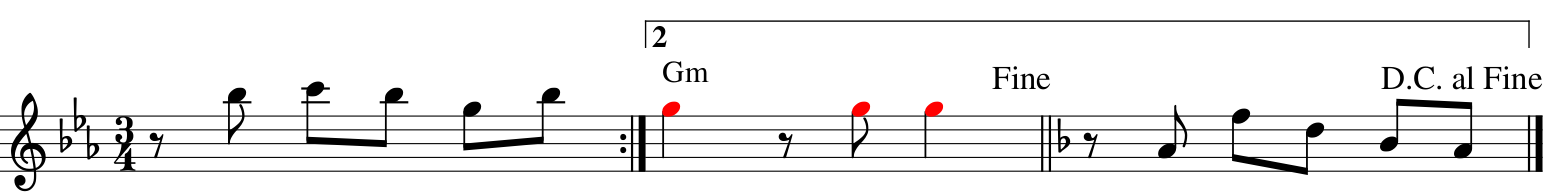

A un ancestro  mm. 17 - 17
Lucas Saboyá


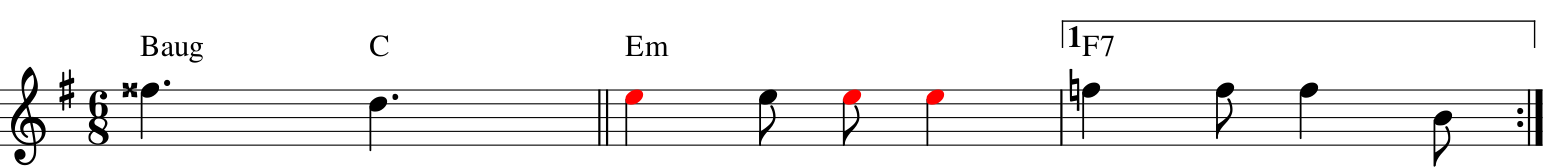

A un ancestro  mm. 19 - 19
Lucas Saboyá


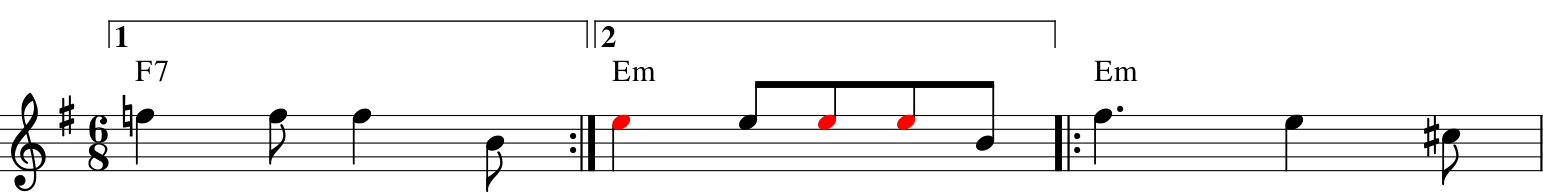

Rondinela  mm. 32 - 32
Alberto Castillo


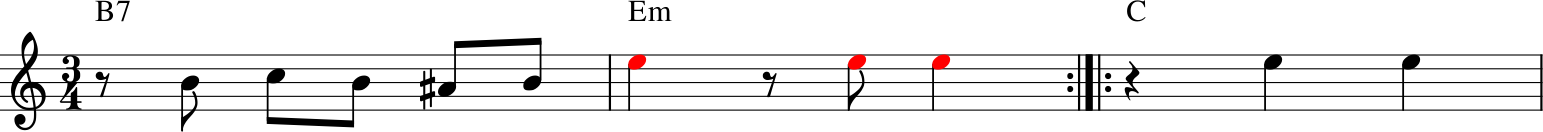

El Pereirano  mm. 33 - 33
Camilo Bedoya


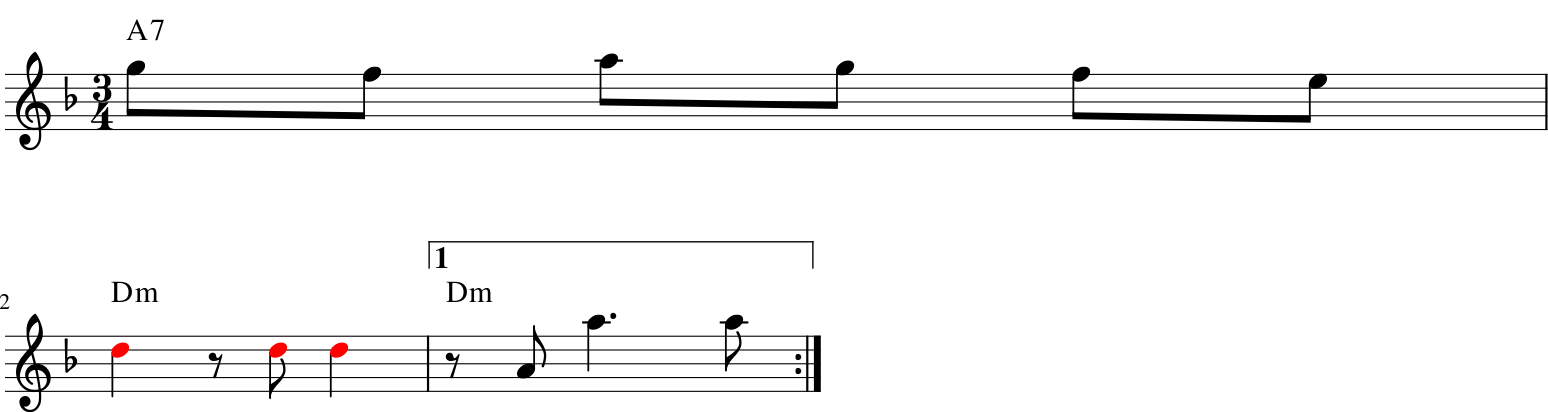

El Pereirano  mm. 51 - 51
Camilo Bedoya


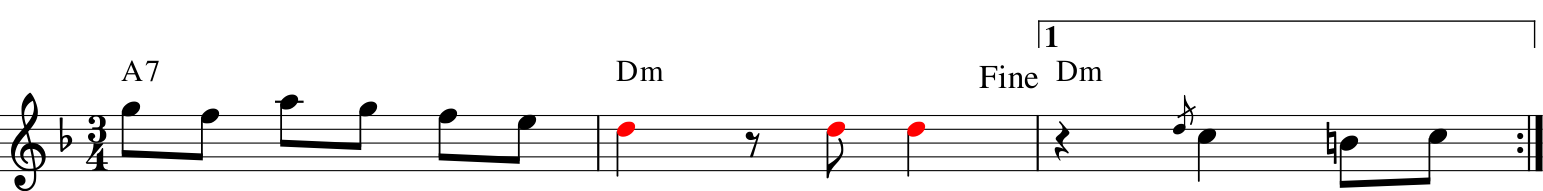

Ojo al toro  mm. 24 - 24
Cantalicio Rojas


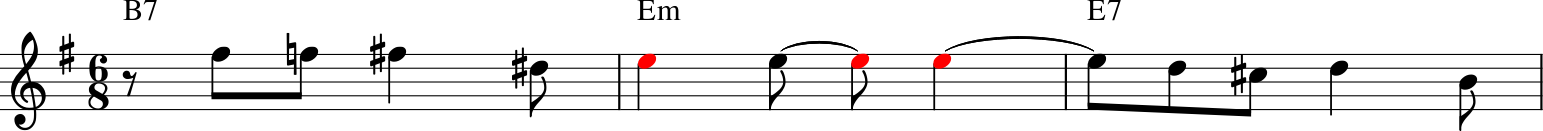

El escandaloso  mm. 16 - 16
Gerardo Rangel


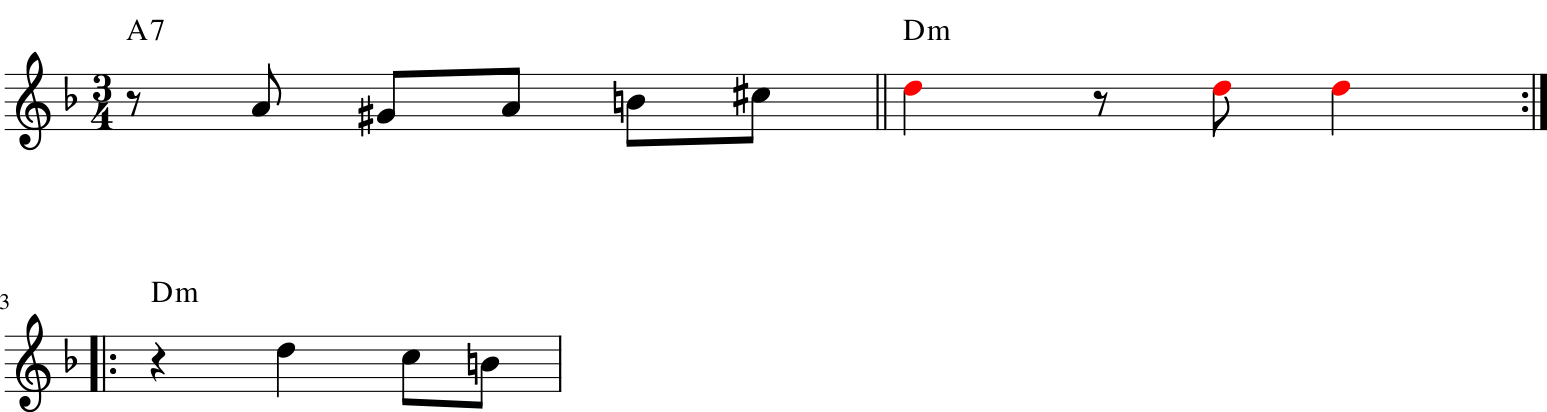

Transparencia  mm. 25 - 25
Juan Javier Polanía Farfán


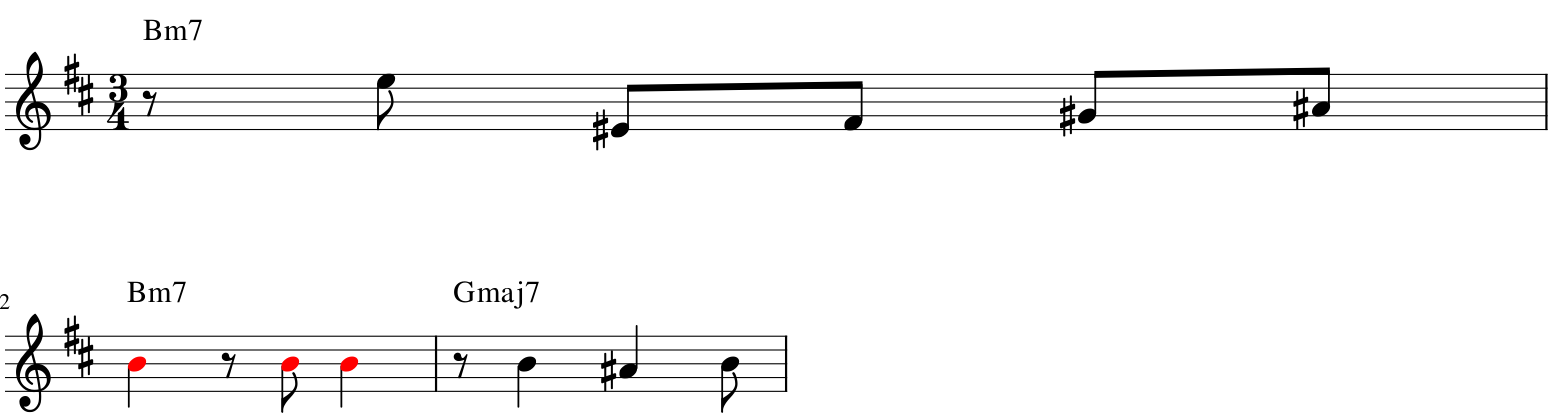

Transparencia  mm. 49 - 49
Juan Javier Polanía Farfán


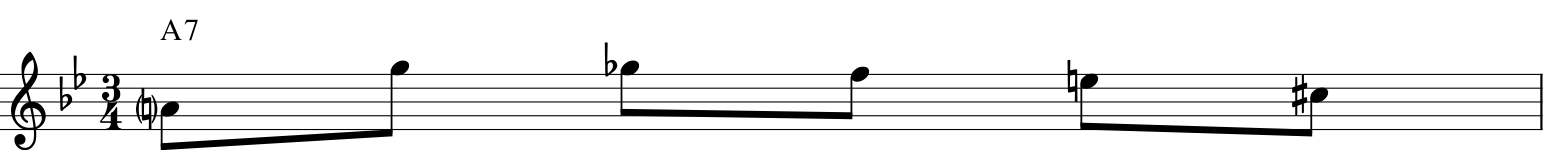

Estudio # 3  mm. 8 - 8
Oscar Navarro Rey


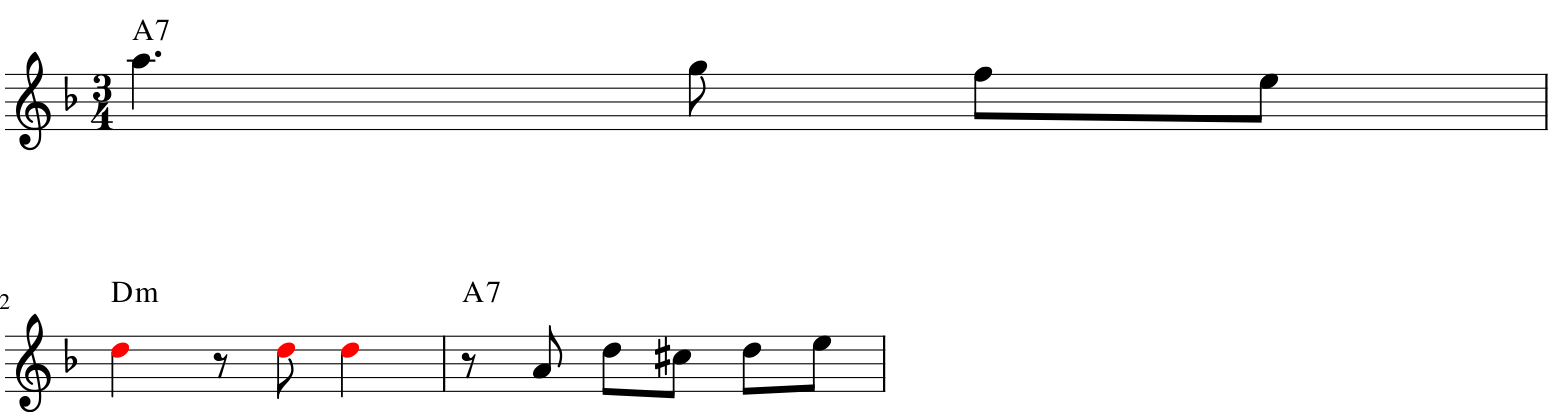

Estudio # 3  mm. 16 - 16
Oscar Navarro Rey


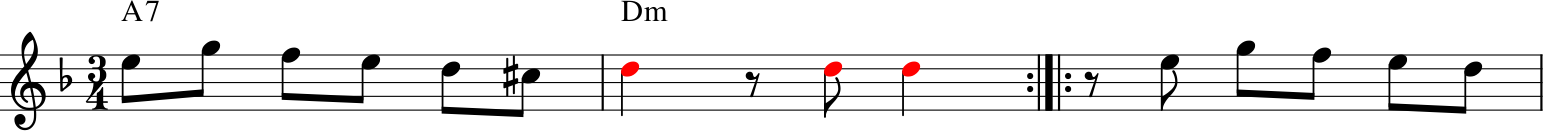

26

In [219]:
buscarPatronEnConjunto('00020',True)

In [216]:
results.to_csv('results.csv', index=False)
#results = pd.read_csv('results.csv')


In [218]:
counts = results['Ocurrencias'].value_counts()
df_counts = pd.DataFrame(counts)
df_counts = df_counts.reset_index()
df_counts = df_counts.rename(columns={'Ocurrencias': 'Patrones'})
df_counts = df_counts.rename(columns={'index': 'Ocurrencias'})
df_counts_sorted = df_counts.sort_values('Ocurrencias', ascending=False)
df_counts_sorted.head(10)


,Ocurrencias,Patrones
2,26,1
0,1,16
1,0,7


<AxesSubplot:xlabel='Ocurrencias', ylabel='Patrones'>

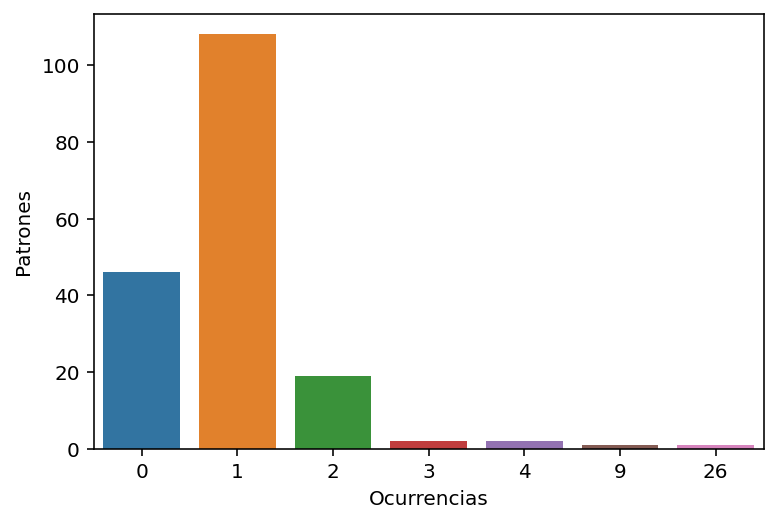

In [105]:
sns.barplot(x='Ocurrencias',y='Patrones', data=df_counts)